In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

## Station geographic category: 

In [2]:
stations = np.load('../first-stations.npy')
print(stations)

[10258500 10259000 10259200 10343500 11141280 11143000 11148900 11162500
 11176400 11180500 11224500 11253310 11264500 11266500 11284400 11381500
 11451100 11475560 11522500 11528700]


such as (SN) to denote the four Sierra Nevada basins,(SC) to denote the three Southern California basins, (NC) for Northern California and(CC) to denote the central coast.

SN: 4,  SC: 3, CC: 5, NC: 5, BA:3

In [3]:
station_dict = {'10258500':'SC', '10259000':'SC', '10259200':'SC', '10343500':'SN', '11141280':'CC', 
                '11143000':'CC', '11148900':'CC', '11162500':'BA', '11176400':'BA', '11180500':'BA', 
                '11224500':'CC', '11253310':'CC', '11264500':'SN', '11266500':'SN', '11284400':'SN', 
                '11381500':'NC', '11451100':'NC', '11475560':'NC', '11522500':'NC', '11528700':'NC'}

SC: 10258500, 10259000, 10259200,   
SN: 10343500, 11264500, 11266500, 11284400,  
CC: 11141280, 11143000, 11148900, 11224500, 11253310,   
NC: 11381500, 11451100, 11475560, 11522500, 11528700,  
BA: 11162500, 11176400, 11180500

In [4]:
order_stations=[10258500, 10259000, 10259200, 11162500, 11176400,
                10343500, 11264500, 11266500, 11284400, 11180500,
                11141280, 11143000, 11148900, 11224500, 11253310, 
                11381500, 11451100, 11475560, 11522500, 11528700,]

In [5]:
SMALL_SIZE=8; MEDIUM_SIZE=14; BIGGER_SIZE=18
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

## Model comparison

In [21]:
lstm_nse = np.load('LSTM_NSE.npy')
tcnn_nse = np.load('CNN_NSE.npy')
ann_nse = np.load('ANN_NSE.npy')
gru_nse = np.load('GRU_NSE.npy')
gru_256 = np.load('GRU_NSE_256.npy')
lstm_256 = np.load('LSTM_NSE_256.npy')
lstm_370 = np.load('LSTM_NSE_370.npy')
linear_nse = np.load('../projection_models/NSE_linear.npy')
print(lstm_nse.shape)

(15, 20)


[10258500 10259000 10259200 10343500 11141280 11143000 11148900 11162500
 11176400 11180500 11224500 11253310 11264500 11266500 11284400 11381500
 11451100 11475560 11522500 11528700]
[-2.47544813]


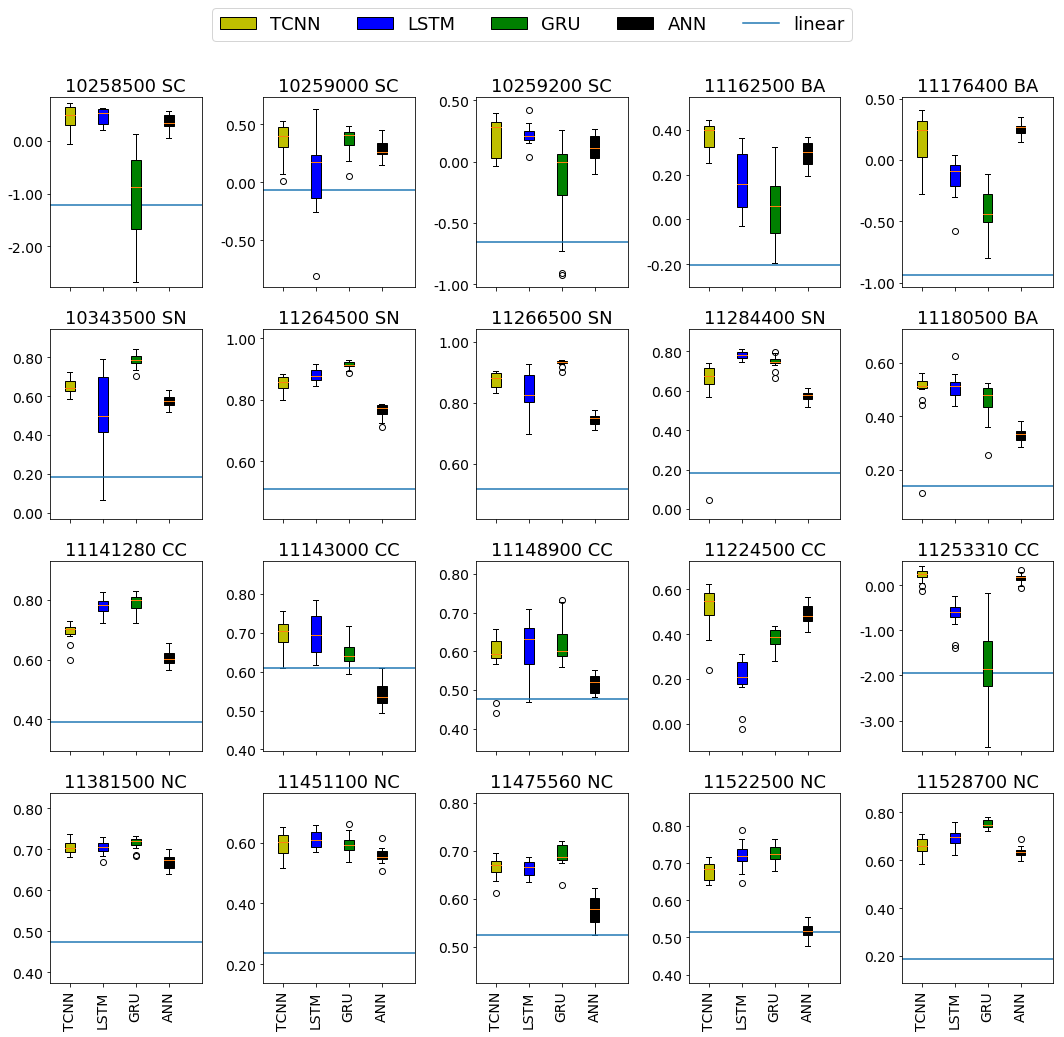

In [15]:
stations = np.load('../first-stations.npy')
print(stations)
fig, axs = plt.subplots(4, 5, sharex=True, sharey=False, figsize=(15,15))
i = 0

for ax in axs.flat:
    station = order_stations[i]
    index = np.argwhere(stations==station)[0]
    if station!=11224500:
        bp1 = ax.boxplot(tcnn_nse[:,index], positions=[0], patch_artist=True, boxprops=dict(facecolor="y"))
        bp2 = ax.boxplot(lstm_256[:,index], positions=[0.5], patch_artist=True, boxprops=dict(facecolor="b"))
        bp3 = ax.boxplot(gru_256[:,index], positions=[1], patch_artist=True, boxprops=dict(facecolor="g"))
        bp4 = ax.boxplot(ann_nse[:,index], positions=[1.5], patch_artist=True, boxprops=dict(facecolor="k"))
        line = ax.axhline(y=linear_nse[index])
        max_nse = np.max([np.max(tcnn_nse[:,index]), np.max(lstm_256[:,index]), 
                          np.max(gru_256[:,index]), np.max(ann_nse[:,index]), linear_nse[index]])
        min_nse = np.min([np.min(tcnn_nse[:,index]), np.min(lstm_256[:,index]), 
                          np.min(gru_256[:,index]), np.min(ann_nse[:,index]), linear_nse[index]])
        ax.set_title(str(station)+' '+station_dict[str(station)])
    else:
        bp1 = ax.boxplot(tcnn_nse[:,index], positions=[0], patch_artist=True, boxprops=dict(facecolor="y"))
        bp2 = ax.boxplot(lstm_256[:,index], positions=[0.5], patch_artist=True, boxprops=dict(facecolor="b"))
        bp3 = ax.boxplot(gru_256[:,index], positions=[1], patch_artist=True, boxprops=dict(facecolor="g"))
        bp4 = ax.boxplot(ann_nse[:,index], positions=[1.5], patch_artist=True, boxprops=dict(facecolor="k"))
        max_nse = np.max([np.max(tcnn_nse[:,index]), np.max(lstm_256[:,index]), 
                          np.max(gru_256[:,index]), np.max(ann_nse[:,index])])
        min_nse = np.min([np.min(tcnn_nse[:,index]), np.min(lstm_256[:,index]), 
                          np.min(gru_256[:,index]), np.min(ann_nse[:,index])])
        ax.set_title(str(station)+' '+station_dict[str(station)])
        print(linear_nse[index])
    ax.set_xlim([-0.3, 2])
    ax.set_xticks([0,0.5,1,1.5])
    ax.set_xticklabels(['TCNN','LSTM','GRU','ANN'])
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_ylim([min_nse-0.1, max_nse+0.1])
    plt.sca(ax)
    plt.xticks(rotation=90)
    i+=1
leg = fig.legend([bp1['boxes'][0], bp2['boxes'][0], bp3['boxes'][0], bp4['boxes'][0], line],
                 ['TCNN', 'LSTM','GRU','ANN', 'linear'], ncol=5, loc='upper center')
# title = fig.suptitle('Ensemble Comparison', fontweight='bold')

fig.tight_layout(rect=[0, 0.03, 1, 0.94])

# plt.savefig('Ensemble-model-compare.eps', bbox_inches='tight', pad_inches=0)
# plt.savefig('Ensemble-model-compare.png', bbox_inches='tight', pad_inches=0)
plt.show()

* Calculation of mean and variation

In [23]:
print(np.mean(lstm_256), ' ', np.mean(lstm_370), ' ', np.mean(tcnn_nse), ' ', np.mean(gru_256), ' ', np.mean(ann_nse))

0.46647428629996684   0.4404289866903963   0.5531202652576782   0.33650069174217256   0.4779011274451951


In [24]:
## Best run
print(np.mean(np.max(lstm_256, axis=0)), ' ', np.mean(np.max(lstm_370, axis=0)), ' ', np.mean(np.max(gru_256, axis=0)), ' ',np.mean(np.max(tcnn_nse, axis=0)))

0.608749593738779   0.5851193374958058   0.5658723246974121   0.6517997103847384


In [10]:
print(np.std(lstm_nse), ' ', np.std(tcnn_nse), ' ', np.std(gru_nse), ' ', np.std(ann_nse))

0.47466626995204086   0.2256015422709923   0.3804060342786121   0.19082805846513543


In [25]:
print(np.std(lstm_256), ' ', np.std(lstm_370), ' ', np.std(gru_256), ' ', np.std(ann_nse))

0.3983448789897286   0.43515657092641036   0.7402066029521231   0.19082805846513543


In [11]:
print(linear_nse)

[-1.22082522 -0.06563893 -0.65457032  0.18418079  0.39237763  0.60874115
  0.47788485 -0.20355995 -0.93948878  0.14168745 -2.47544813 -1.94180848
  0.51144504  0.51764745  0.18480818  0.47316121  0.23676365  0.52424309
  0.51380066  0.18592028]


### suplement comparison

[10258500 10259000 10259200 10343500 11141280 11143000 11148900 11162500
 11176400 11180500 11224500 11253310 11264500 11266500 11284400 11381500
 11451100 11475560 11522500 11528700]
[-2.47544813]


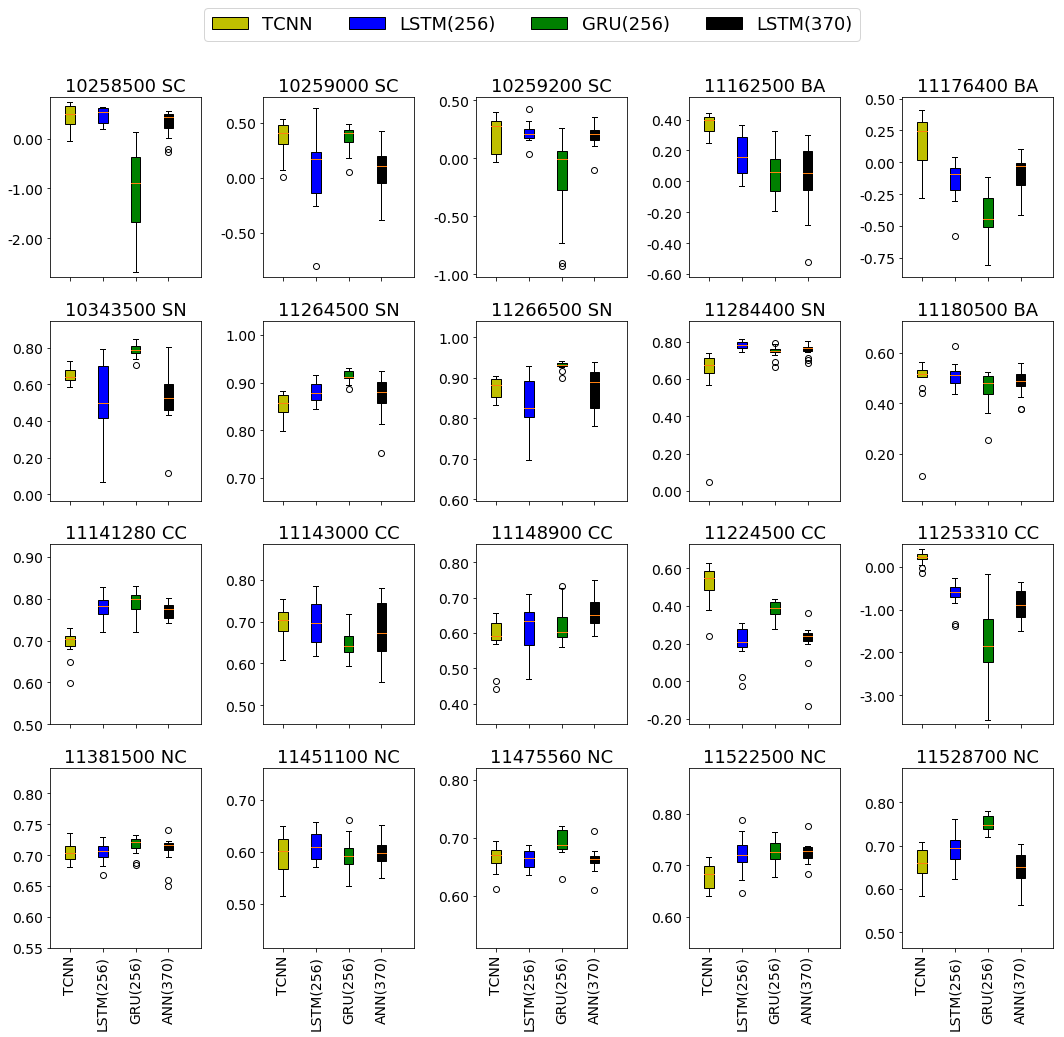

In [29]:
stations = np.load('../first-stations.npy')
print(stations)
fig, axs = plt.subplots(4, 5, sharex=True, sharey=False, figsize=(15,15))
i = 0

for ax in axs.flat:
    station = order_stations[i]
    index = np.argwhere(stations==station)[0]
    if station!=11224500:
        bp1 = ax.boxplot(tcnn_nse[:,index], positions=[0], patch_artist=True, boxprops=dict(facecolor="y"))
        bp2 = ax.boxplot(lstm_256[:,index], positions=[0.5], patch_artist=True, boxprops=dict(facecolor="b"))
        bp3 = ax.boxplot(gru_256[:,index], positions=[1], patch_artist=True, boxprops=dict(facecolor="g"))
        bp4 = ax.boxplot(lstm_370[:,index], positions=[1.5], patch_artist=True, boxprops=dict(facecolor="k"))
        
        max_nse = np.max([np.max(tcnn_nse[:,index]), np.max(lstm_256[:,index]), 
                          np.max(gru_256[:,index]), np.max(lstm_370[:,index])])
        min_nse = np.min([np.min(tcnn_nse[:,index]), np.min(lstm_256[:,index]), 
                          np.min(gru_256[:,index]), np.min(lstm_370[:,index])])
        ax.set_title(str(station)+' '+station_dict[str(station)])
    else:
        bp1 = ax.boxplot(tcnn_nse[:,index], positions=[0], patch_artist=True, boxprops=dict(facecolor="y"))
        bp2 = ax.boxplot(lstm_256[:,index], positions=[0.5], patch_artist=True, boxprops=dict(facecolor="b"))
        bp3 = ax.boxplot(gru_256[:,index], positions=[1], patch_artist=True, boxprops=dict(facecolor="g"))
        bp4 = ax.boxplot(lstm_370[:,index], positions=[1.5], patch_artist=True, boxprops=dict(facecolor="k"))
        max_nse = np.max([np.max(tcnn_nse[:,index]), np.max(lstm_256[:,index]), 
                          np.max(gru_256[:,index]), np.max(lstm_370[:,index])])
        min_nse = np.min([np.min(tcnn_nse[:,index]), np.min(lstm_256[:,index]), 
                          np.min(gru_256[:,index]), np.min(lstm_370[:,index])])
        ax.set_title(str(station)+' '+station_dict[str(station)])
        print(linear_nse[index])
    ax.set_xlim([-0.3, 2])
    ax.set_xticks([0,0.5,1,1.5])
    ax.set_xticklabels(['TCNN','LSTM(256)','GRU(256)','ANN(370)'])
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_ylim([min_nse-0.1, max_nse+0.1])
    plt.sca(ax)
    plt.xticks(rotation=90)
    i+=1
leg = fig.legend([bp1['boxes'][0], bp2['boxes'][0], bp3['boxes'][0], bp4['boxes'][0]],
                 ['TCNN', 'LSTM(256)','GRU(256)','LSTM(370)'], ncol=4, loc='upper center')
# title = fig.suptitle('Ensemble Comparison', fontweight='bold')

fig.tight_layout(rect=[0, 0.03, 1, 0.94])

plt.savefig('Supp-model-compare.eps', bbox_inches='tight', pad_inches=0)
# plt.savefig('Ensemble-model-compare.png', bbox_inches='tight', pad_inches=0)
plt.show()

## MSE for High and Low

### Low flow MSE

In [12]:
lstm_mse_low = np.load('LSTM_low_mse.npy')
gru_mse_low = np.load('GRU_low_mse.npy')
ann_mse_low = np.load('ANN_low_mse.npy')
cnn_mse_low = np.load('CNN_low_mse.npy')
print(cnn_mse_low.shape)

(15, 20)


[10258500 10259000 10259200 10343500 11141280 11143000 11148900 11162500
 11176400 11180500 11224500 11253310 11264500 11266500 11284400 11381500
 11451100 11475560 11522500 11528700]


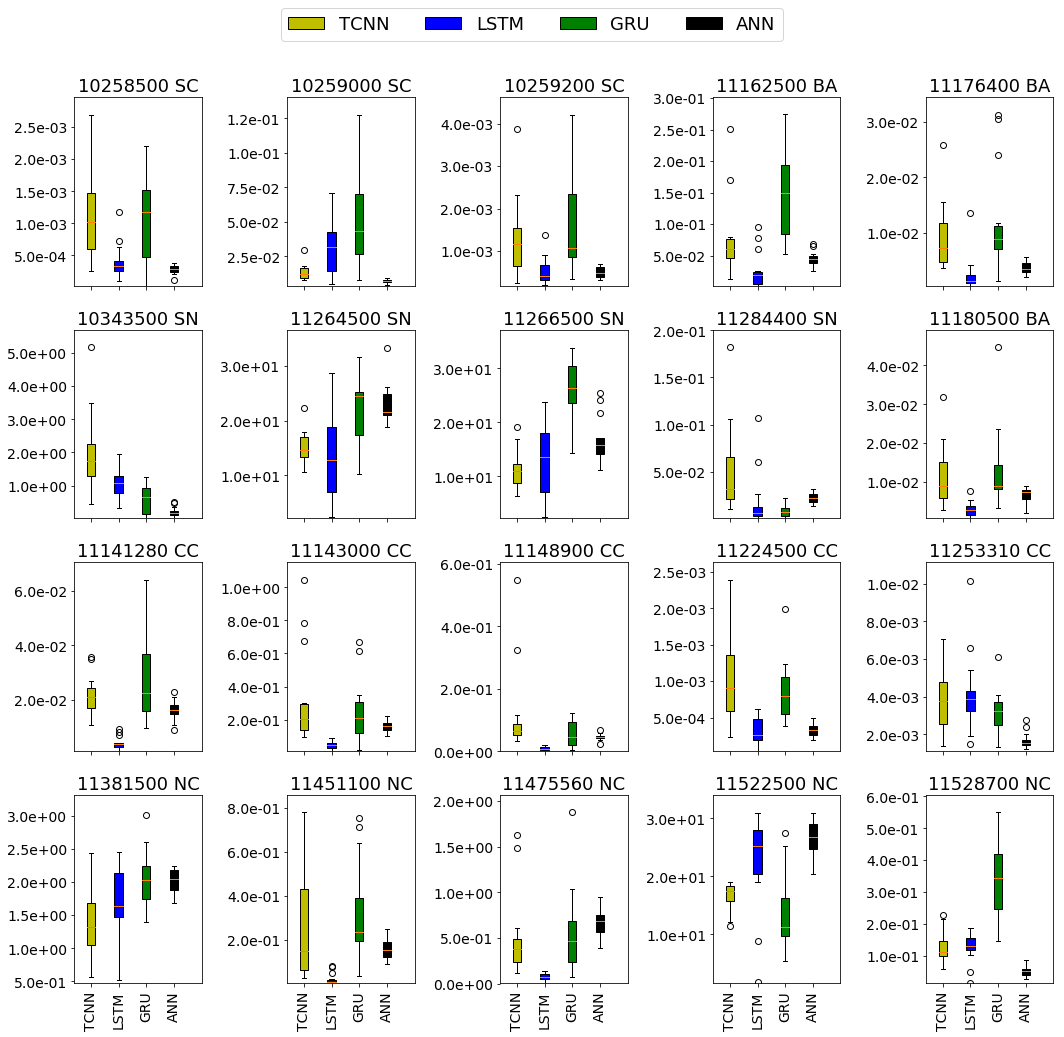

In [30]:
stations = np.load('../first-stations.npy')
print(stations)
fig, axs = plt.subplots(4, 5, sharex=True, sharey=False, figsize=(15,15))
i = 0

for ax in axs.flat:
    station = order_stations[i]
    index = np.argwhere(stations==station)[0]
    bp1 = ax.boxplot(cnn_mse_low[:,index], positions=[0], patch_artist=True, boxprops=dict(facecolor="y"))
    bp2 = ax.boxplot(lstm_mse_low[:,index], positions=[0.5], patch_artist=True, boxprops=dict(facecolor="b"))
    bp3 = ax.boxplot(gru_mse_low[:,index], positions=[1], patch_artist=True, boxprops=dict(facecolor="g"))
    bp4 = ax.boxplot(ann_mse_low[:,index], positions=[1.5], patch_artist=True, boxprops=dict(facecolor="k"))
    # line = ax.axhline(y=linear_nse[i])
    max_nse = np.max([np.max(cnn_mse_low[:,index]), np.max(lstm_mse_low[:,index]), 
                      np.max(gru_mse_low[:,index]), np.max(ann_mse_low[:,index])])
    min_nse = np.min([np.min(cnn_mse_low[:,index]), np.min(lstm_mse_low[:,index]), 
                      np.min(gru_mse_low[:,index]), np.min(ann_mse_low[:,index])])
    ax.set_title(str(station)+' '+station_dict[str(station)])
    ax.set_xlim([-0.3, 2])
    ax.set_xticks([0,0.5,1,1.5])
    ax.set_xticklabels(['TCNN','LSTM','GRU','ANN'])
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1e'))
    ax.set_ylim([min_nse*0.9, max_nse*1.1])
    # ax.set_yticks(np.linspace(min_nse*0.9, max_nse*1.1, 3))
    plt.sca(ax)
    plt.xticks(rotation=90)
    i+=1
leg = fig.legend([bp1['boxes'][0], bp2['boxes'][0], bp3['boxes'][0], bp4['boxes'][0]],
                 ['TCNN', 'LSTM','GRU','ANN'], ncol=4, loc='upper center')
# title = fig.suptitle('Ensemble Comparison', fontweight='bold')

fig.tight_layout(rect=[0, 0.03, 1, 0.94])

plt.savefig('Ensemble-model-low-flow.eps', bbox_inches='tight', pad_inches=0)
# plt.savefig('Ensemble-model-compare.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [44]:
count=0
bc=0
bad=0
t_bad=0
for i in range(20):
    a = np.mean(cnn_mse_low[:,i])
    b = np.mean(lstm_mse_low[:,i])
    c = np.mean(gru_mse_low[:,i])
    d = np.mean(ann_mse_low[:,i])
    if a==np.min([a,b,c,d]):
        count+=1
    if b==np.min([a,b,c,d]):
        bc+=1
    if b==np.max([a,b,c,d]):
        bad+=1
    if a==np.max([a,b,c,d]):
        t_bad+=1
print(count, ' ', bc)
print(t_bad, ' ', bad)
count=0
bc=0
bad=0
t_bad=0
for i in range(20):
    a = np.min(cnn_mse_low[:,i])
    b = np.min(lstm_mse_low[:,i])
    c = np.min(gru_mse_low[:,i])
    d = np.min(ann_mse_low[:,i])
    if a==np.min([a,b,c,d]):
        count+=1
    if b==np.min([a,b,c,d]):
        bc+=1
    if b==np.max([a,b,c,d]):
        bad+=1
    if a==np.max([a,b,c,d]):
        t_bad+=1
print(count, ' ', bc)
print(t_bad, ' ', bad)

2   10
6   1
0   16
5   1


### High flow MSE

In [31]:
lstm_mse_high = np.load('LSTM_high_mse.npy')
gru_mse_high = np.load('GRU_high_mse.npy')
ann_mse_high = np.load('ANN_high_mse.npy')
cnn_mse_high = np.load('CNN_high_mse.npy')
print(cnn_mse_high.shape)

(15, 20)


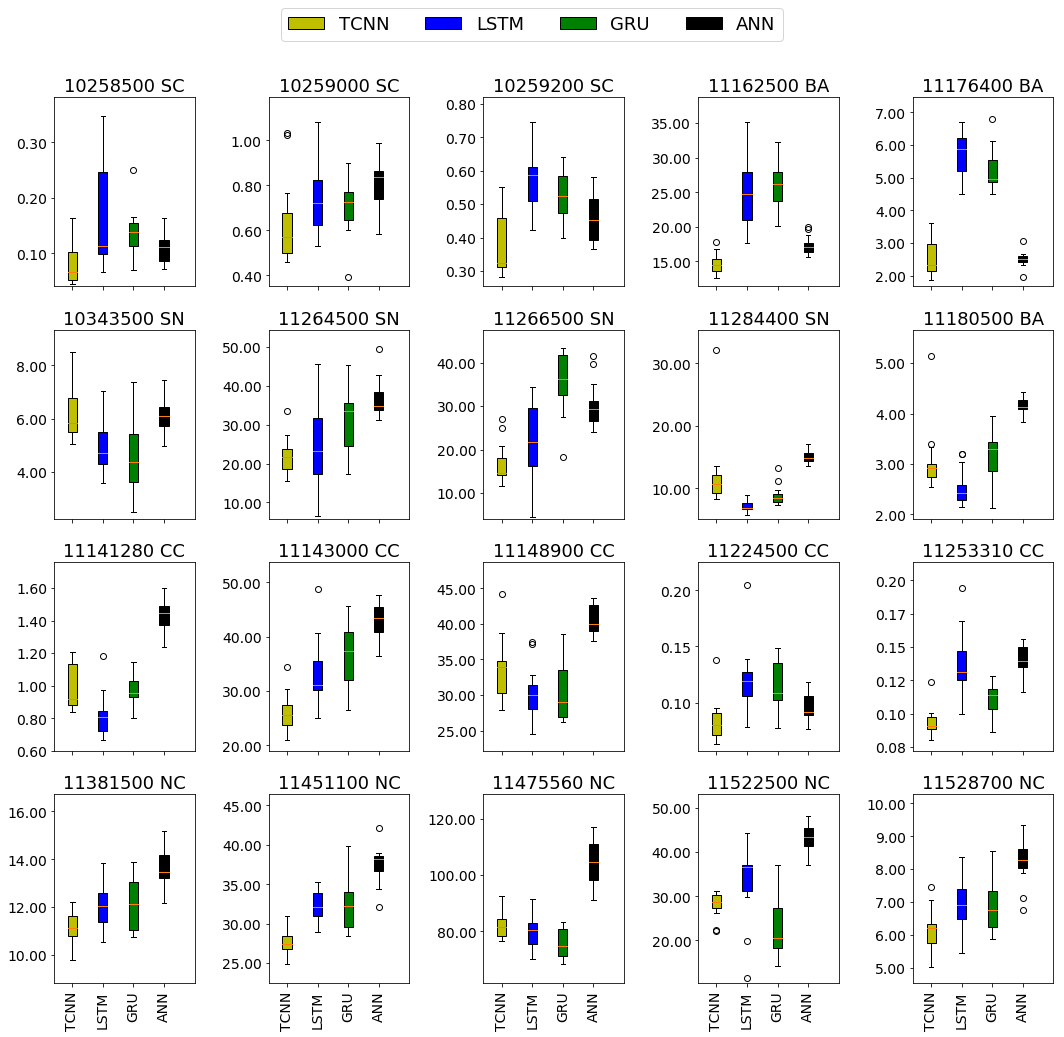

In [34]:
fig, axs = plt.subplots(4, 5, sharex=True, sharey=False, figsize=(15,15))
i = 0

for ax in axs.flat:
    station = order_stations[i]
    index = np.argwhere(stations==station)[0]
    bp1 = ax.boxplot(cnn_mse_high[:,index], positions=[0], patch_artist=True, boxprops=dict(facecolor="y"))
    bp2 = ax.boxplot(lstm_mse_high[:,index], positions=[0.5], patch_artist=True, boxprops=dict(facecolor="b"))
    bp3 = ax.boxplot(gru_mse_high[:,index], positions=[1], patch_artist=True, boxprops=dict(facecolor="g"))
    bp4 = ax.boxplot(ann_mse_high[:,index], positions=[1.5], patch_artist=True, boxprops=dict(facecolor="k"))
    # line = ax.axhline(y=linear_nse[i])
    max_nse = np.max([np.max(cnn_mse_high[:,index]), np.max(lstm_mse_high[:,index]), 
                      np.max(gru_mse_high[:,index]), np.max(ann_mse_high[:,index])])
    min_nse = np.min([np.min(cnn_mse_high[:,index]), np.min(lstm_mse_high[:,index]), 
                      np.min(gru_mse_high[:,index]), np.min(ann_mse_high[:,index])])
    ax.set_title(str(station)+' '+station_dict[str(station)])
    ax.set_xlim([-0.3, 2])
    ax.set_xticks([0,0.5,1,1.5])
    ax.set_xticklabels(['TCNN','LSTM','GRU','ANN'])
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_ylim([min_nse*0.9, max_nse*1.1])
    # ax.set_yticks(np.linspace(min_nse*0.9, max_nse*1.1, 3))
    plt.sca(ax)
    plt.xticks(rotation=90)
    i+=1
leg = fig.legend([bp1['boxes'][0], bp2['boxes'][0], bp3['boxes'][0], bp4['boxes'][0]],
                 ['TCNN', 'LSTM','GRU','ANN'], ncol=4, loc='upper center')
# title = fig.suptitle('Ensemble Comparison', fontweight='bold')

fig.tight_layout(rect=[0, 0.03, 1, 0.94])

plt.savefig('Ensemble-model-high-flow.eps', bbox_inches='tight', pad_inches=0)
# plt.savefig('Ensemble-model-compare.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [45]:
count=0
bc=0
bad=0
t_bad=0
for i in range(20):
    a = np.mean(cnn_mse_high[:,i])
    b = np.mean(lstm_mse_high[:,i])
    c = np.mean(gru_mse_high[:,i])
    d = np.mean(ann_mse_high[:,i])
    if a==np.min([a,b,c,d]):
        count+=1
    if b==np.min([a,b,c,d]):
        bc+=1
    if b==np.max([a,b,c,d]):
        bad+=1
    if a==np.max([a,b,c,d]):
        t_bad+=1
print(count, ' ', bc)
print(t_bad, ' ', bad)
count=0
bc=0
bad=0
t_bad=0
for i in range(20):
    a = np.min(cnn_mse_high[:,i])
    b = np.min(lstm_mse_high[:,i])
    c = np.min(gru_mse_high[:,i])
    d = np.min(ann_mse_high[:,i])
    if a==np.min([a,b,c,d]):
        count+=1
    if b==np.min([a,b,c,d]):
        bc+=1
    if b==np.max([a,b,c,d]):
        bad+=1
    if a==np.max([a,b,c,d]):
        t_bad+=1
print(count, ' ', bc)
print(t_bad, ' ', bad)

12   4
1   4
10   6
1   3


### Normalize by low high flow rate

## Variables

In [16]:
ps = np.load('DCNN/d_dcnn_365_ps_nse.npy')
pt = np.load('DCNN/d_dcnn_365_pt_nse.npy')
p = np.load('DCNN/d_dcnn_365_p_nse.npy')
tcnn_nse = np.load('CNN_NSE.npy')
print(p.shape)

(15, 20)


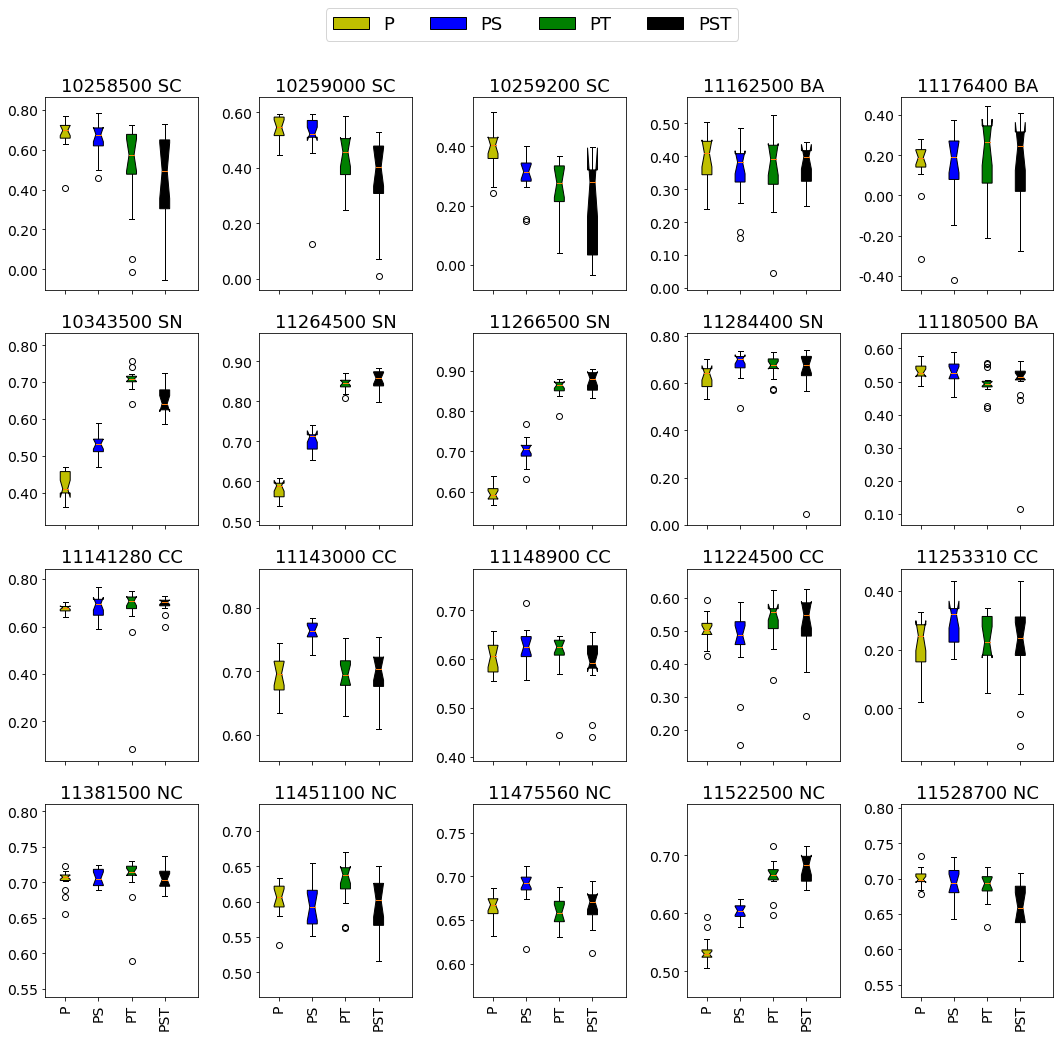

In [48]:
fig, axs = plt.subplots(4, 5, sharex=True, sharey=False, figsize=(15,15))
i = 0

for ax in axs.flat:
    station = order_stations[i]
    index = np.argwhere(stations==station)[0]
    bp1 = ax.boxplot(p[:,index], positions=[0], patch_artist=True, boxprops=dict(facecolor="y"), notch=1)
    bp2 = ax.boxplot(ps[:,index], positions=[0.5], patch_artist=True, boxprops=dict(facecolor="b"), notch=1)
    bp3 = ax.boxplot(pt[:,index], positions=[1], patch_artist=True, boxprops=dict(facecolor="g"), notch=1)
    bp4 = ax.boxplot(tcnn_nse[:,index], positions=[1.5], patch_artist=True, boxprops=dict(facecolor="k"), notch=1)
    # line = ax.axhline(y=linear_nse[i])
    max_nse = np.max([np.max(p[:,index]), np.max(ps[:,index]), 
                      np.max(pt[:,index]), np.max(tcnn_nse[:,index])])
    min_nse = np.min([np.min(p[:,index]), np.min(ps[:,index]), 
                      np.min(pt[:,index]), np.min(tcnn_nse[:,index])])
    ax.set_title(str(station)+' '+station_dict[str(station)])
    ax.set_xlim([-0.3, 2])
    ax.set_xticks([0,0.5,1,1.5])
    ax.set_xticklabels(['P','PS','PT','PST'])
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_ylim([min_nse-0.05, max_nse*1.1])
    # ax.set_yticks(np.linspace(min_nse*0.9, max_nse*1.1, 3))
    plt.sca(ax)
    plt.xticks(rotation=90)
    i+=1
leg = fig.legend([bp1['boxes'][0], bp2['boxes'][0], bp3['boxes'][0], bp4['boxes'][0]],
                 ['P', 'PS','PT','PST'], ncol=4, loc='upper center')
# title = fig.suptitle('Ensemble Comparison', fontweight='bold')

fig.tight_layout(rect=[0, 0.03, 1, 0.94])

plt.savefig('Ensemble-pst-compare.eps', bbox_inches='tight', pad_inches=0)

plt.show()

From previous:

PS: 11143000, 11180500, 11253310, 11475560

PT: 10343500, 11162500(not), 11264500, 11266500, 11451100.

* Calculate interquantile range 

In [22]:
for i in range(20):
    data_ps = ps[:,i]
    data_pt = pt[:,i]
    median_ps = np.median(data_ps)
    upper_quartile_ps = np.percentile(data_ps, 75)
    lower_quartile_ps = np.percentile(data_ps, 25)
    median_pt = np.median(data_pt)
    upper_quartile_pt = np.percentile(data_pt, 75)
    lower_quartile_pt = np.percentile(data_pt, 25)
    if median_ps>upper_quartile_pt:
        print('ps better--', stations[i])
    if median_pt>upper_quartile_ps:
        print('pt better--', stations[i])

ps better-- 10259000
pt better-- 10343500
ps better-- 11143000
ps better-- 11180500
pt better-- 11224500
ps better-- 11253310
pt better-- 11264500
pt better-- 11266500
pt better-- 11451100
ps better-- 11475560
pt better-- 11522500


## Windowsize

In [7]:
TCNN_100 = np.load('windowsize/d_100_dcnn_nse.npy')
TCNN_180 = np.load('windowsize/d_180_dcnn_nse.npy')
TCNN_365 = np.load('CNN_NSE.npy')
print(TCNN_180.shape)

(15, 20)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


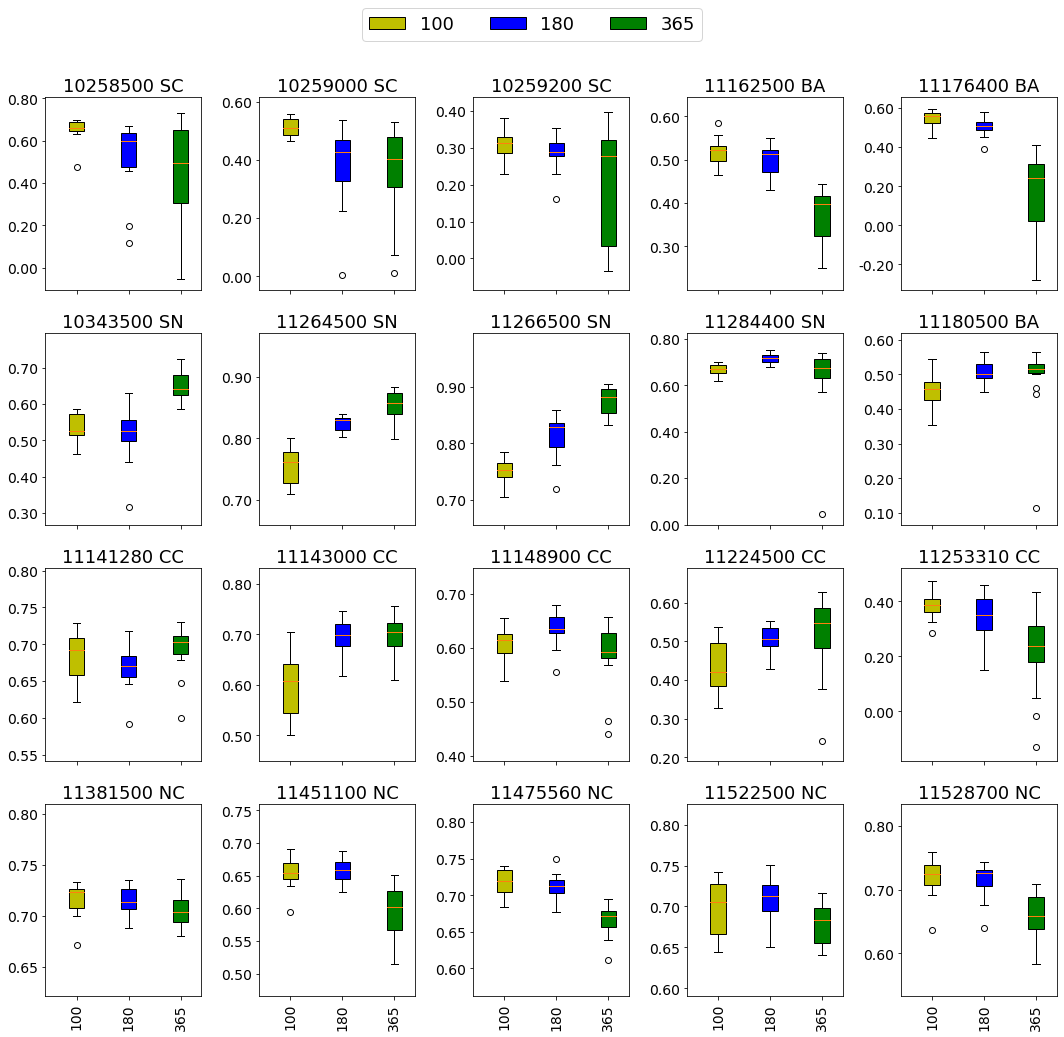

In [8]:
fig, axs = plt.subplots(4, 5, sharex=True, sharey=False, figsize=(15,15))
i = 0

for ax in axs.flat:
    station = order_stations[i]
    index = np.argwhere(stations==station)[0]
    bp1 = ax.boxplot(TCNN_100[:,index], positions=[0], patch_artist=True, boxprops=dict(facecolor="y"))
    bp2 = ax.boxplot(TCNN_180[:,index], positions=[0.5], patch_artist=True, boxprops=dict(facecolor="b"))
    bp3 = ax.boxplot(TCNN_365[:,index], positions=[1], patch_artist=True, boxprops=dict(facecolor="g"))
    
    max_nse = np.max([np.max(TCNN_100[:,index]), np.max(TCNN_180[:,index]), np.max(TCNN_365[:,index])])
    min_nse = np.min([np.min(TCNN_100[:,index]), np.min(TCNN_180[:,index]), np.min(TCNN_365[:,index])])
    ax.set_title(str(station)+' '+station_dict[str(station)])
    
    ax.set_xlim([-0.3, 1.2])
    ax.set_xticks([0,0.5,1])
    ax.set_xticklabels(['100','180','365'])
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_ylim([min_nse-0.05, max_nse*1.1])
    # ax.set_yticks(np.linspace(min_nse*0.9, max_nse*1.1, 3))
    plt.sca(ax)
    plt.xticks(rotation=90)
    i+=1
leg = fig.legend([bp1['boxes'][0], bp2['boxes'][0], bp3['boxes'][0]],
                 ['100', '180','365'], ncol=3, loc='upper center')
# title = fig.suptitle('Ensemble Comparison', fontweight='bold')

fig.tight_layout(rect=[0, 0.03, 1, 0.94])

plt.savefig('Ensemble-windowsize-compare.eps', bbox_inches='tight', pad_inches=0)

plt.show()

In [ ]:
fig, axs = plt.subplots(5, 5, sharex=True, sharey=False, figsize=(15,17))
i = 0 ## plot order
r=0; c=0
print(axs.shape)
# for ax in axs:
category='None'
while i<20:
    station = order_stations[i]
    cat = station_dict[str(station)]
    if category=='None':
        category=cat
    if category!=cat:
        # print(category, ' ', cat)
        category=cat
        r+=1; c=0
    # print(station)
    if c>4:
        c=0; r+=1
    ax = axs[r,c]
    index = np.argwhere(stations==station)[0] ## alphbet order
    bp1 = ax.boxplot(TCNN_100[:,index], positions=[0], patch_artist=True, boxprops=dict(facecolor="y"))
    bp2 = ax.boxplot(TCNN_180[:,index], positions=[0.5], patch_artist=True, boxprops=dict(facecolor="b"))
    bp3 = ax.boxplot(TCNN_365[:,index], positions=[1], patch_artist=True, boxprops=dict(facecolor="g"))
    
    max_nse = np.max([np.max(TCNN_100[:,index]), np.max(TCNN_180[:,index]), np.max(TCNN_365[:,index])])
    min_nse = np.min([np.min(TCNN_100[:,index]), np.min(TCNN_180[:,index]), np.min(TCNN_365[:,index])])
    ax.set_title(str(station)+' '+station_dict[str(station)])
    ax.set_xlim([-0.3, 1.2])
    ax.set_xticks([0,0.5,1])
    ax.set_xticklabels(['100','180','365'])
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_ylim([min_nse-0.05, max_nse*1.1])
    # ax.set_yticks(np.linspace(min_nse*0.9, max_nse*1.1, 3))
    plt.sca(ax)
    plt.xticks(rotation=90)
    i+=1
    c+=1
leg = fig.legend([bp1['boxes'][0], bp2['boxes'][0], bp3['boxes'][0]],
                 ['100', '180','365'], ncol=3, loc='upper center')
# title = fig.suptitle('Ensemble Comparison', fontweight='bold')

fig.tight_layout(rect=[0, 0.03, 1, 0.94])

axs[0,3].set_axis_off()
axs[0,4].set_axis_off()
axs[2,3].set_axis_off()
axs[2,4].set_axis_off()
axs[3,4].set_axis_off()


# plt.savefig('Ensemble-model-compare.eps', bbox_inches='tight', pad_inches=0)
plt.savefig('Ensemble-window-compare.png', bbox_inches='tight', pad_inches=0)
plt.show()

previous:
    
increasing: 10343500, 11224500, 11264500, 11266500. 11143000

decresing: 11162500, 11176400, 11381500, 11475560, 11522500(not). 10258500, 10259000, 10259200, 11253310, 11528700

In [ ]:
print(np.argwhere(stations==11528700))

In [ ]:
category='NC'
cat='NC'
category==cat

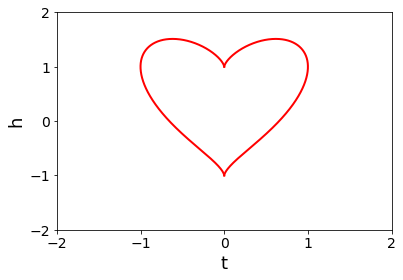

In [20]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import math

def drawHeart():
    t = np.linspace(0, math.pi, 1000)
    x = np.sin(t)
    y = np.cos(t) + np.power(x, 2.0/3)
    plt.plot(x, y, color='red', linewidth=2, label='h')
    plt.plot(-x, y, color='red', linewidth=2, label='-h')
    plt.xlabel('t')
    plt.ylabel('h')
    plt.ylim(-2, 2)
    plt.xlim(-2, 2)
    
    # plt.legend()
    plt.show()
 
drawHeart()